In [2]:

from sklearn.base import BaseEstimator,TransformerMixin
class custompreprocess(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names= attribute_names
    def fit(self,X,y=None):
        self.mapping={}
        for var_name in self.attribute_names:
            yarr=[]
            for c in X[var_name].unique():
                yarr.append(X[c==X[var_name]].y.mean())

            A=pd.DataFrame({'y_mean':yarr,var_name:X[var_name].unique()})
            B=A.sort_values("y_mean")
            values = np.arange(1,len(B[var_name].values)+1)
            keys = B[var_name].values
            #dictionary['a']
            self.mapping[var_name] = dict(zip(keys, values))
            #train_df.X0.replace(to_replace=B.X0.values,value=B['index'].values, inplace=True)
            #print(var_name)
        
        return self
    def transform(self,X,y=None):
        for c in contAttr:
            for a in X[c].unique():
                if  a not in csp.mapping[c]:
                    #print (a,c)
                    self.mapping[c][a]=1
        for var_name in self.attribute_names:
            dictionary=self.mapping[var_name]
            C=X[var_name].apply(lambda s:dictionary[s])
            X[var_name]=C



In [3]:
##my label encoder
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cross_validation import KFold



train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
# read datasets
#train = pd.read_csv('../input/train.csv')
#test = pd.read_csv('../input/test.csv')

# process columns, apply LabelEncoder to categorical features
# for c in train.columns:
#     if train[c].dtype == 'object':
#         lbl = LabelEncoder() 
#         lbl.fit(list(train[c].values) + list(test[c].values)) 
#         train[c] = lbl.transform(list(train[c].values))
#         test[c] = lbl.transform(list(test[c].values))

# # shape        

print('Shape train: {}\nShape test: {}'.format(train.shape, test.shape))


from sklearn.preprocessing import StandardScaler


contAttr=["X0","X1","X2","X3","X4","X5","X6","X8"]
#scl=StandardScaler()
csp=custompreprocess(contAttr)
csp.fit_transform(train)
#X_train=train.drop('y',axis=1)
#scl.fit_transform(X_train)
#X_train.y= train.y
#train=X_train
csp.transform(test)
#scl.transform(test)  


##Add decomposed components: PCA / ICA etc.
from sklearn.decomposition import PCA, FastICA
from sklearn.decomposition import TruncatedSVD
n_comp = 12

# tSVD
tsvd = TruncatedSVD(n_components=n_comp, random_state=420)
tsvd_results_train = tsvd.fit_transform(train.drop(["y"], axis=1))
tsvd_results_test = tsvd.transform(test)

# PCA
pca = PCA(n_components=n_comp, random_state=420)
pca2_results_train = pca.fit_transform(train.drop(["y"], axis=1))
pca2_results_test = pca.transform(test)

# ICA
ica = FastICA(n_components=n_comp, random_state=420)
ica2_results_train = ica.fit_transform(train.drop(["y"], axis=1))
ica2_results_test = ica.transform(test)

# GRP
grp = GaussianRandomProjection(n_components=n_comp, eps=0.1, random_state=420)
grp_results_train = grp.fit_transform(train.drop(["y"], axis=1))
grp_results_test = grp.transform(test)

# SRP
srp = SparseRandomProjection(n_components=n_comp, dense_output=True, random_state=420)
srp_results_train = srp.fit_transform(train.drop(["y"], axis=1))
srp_results_test = srp.transform(test)

# Append decomposition components to datasets
for j in range(1,6):
    for i in range(1, n_comp+1):
        train['pca_' + str(i)+" "+str(j)] = pca2_results_train[:,i-1]**j
        test['pca_' + str(i)+" "+str(j)] = pca2_results_test[:, i-1]**j

        train['ica_' + str(i)+" "+str(j)] = ica2_results_train[:,i-1]**j
        test['ica_' + str(i)+" "+str(j)] = ica2_results_test[:, i-1]**j

        train['grp_' + str(i)+" "+str(j)] = grp_results_train[:,i-1]**j
        test['grp_' + str(i)+" "+str(j)] = grp_results_test[:, i-1]**j

        train['srp_' + str(i)+" "+str(j)] = srp_results_train[:,i-1]**j
        test['srp_' + str(i)+" "+str(j)] = srp_results_test[:, i-1]**j

for j in range(2,6):
    for i in contAttr:
        train[i+" "+str(j)]=train[i]**j
        test[i+" "+str(j)]=test[i]**j



y_train = train["y"]
y_mean = np.mean(y_train)



    
# Shape train: (4209, 378)
# Shape test: (4209, 377)
# 500 0.112909154221 [-0.029547173787011882, 0.16510708790470929, -0.074616941453188979, 0.39069364422043018]
# 700 0.210801567131 [0.10874397339077435, 0.25463399948732979, 0.036688454506113466, 0.44313984113927729]
# 900 0.228570514572 [0.14049684093852144, 0.27493549393443018, 0.064287851658202166, 0.43456187175768235]
# 1100 0.237215871492 [0.15307917903147872, 0.28534435163624583, 0.082660858561678596, 0.42777909673713399]
# 1300 0.242106137388 [0.16904163306947095, 0.28948467839892711, 0.091891382038096991, 0.41800685604507382]
# 1500 0.24275405297 [0.17106865010880123, 0.29190377731803463, 0.098263792727128596, 0.40977999172673785]
# 1700 0.244487415886 [0.1683151021847672, 0.29450225430130428, 0.10626899112931631, 0.40886331592934744]
# 1900 0.246936944142 [0.16849060476390665, 0.29737904525633263, 0.11595412959484352, 0.4059239969529217]
# 2000 0.248168239935 [0.16996957981682737, 0.29799922747270213, 0.12102883144718557, 0.40367532100236903]
# 2200 0.245355338033 [0.16117987199085249, 0.29954748961387945, 0.12465613985616852, 0.39603785067303998]
# 2400 0.243031712212 [0.15247840844530025, 0.30152404834204516, 0.12897605651674571, 0.38914833554321238]



/home/163190012/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Shape train: (4209, 378)
Shape test: (4209, 377)


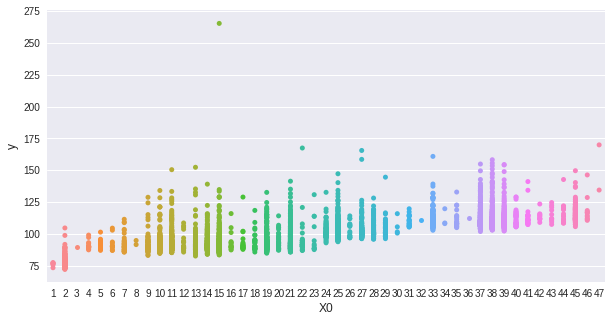

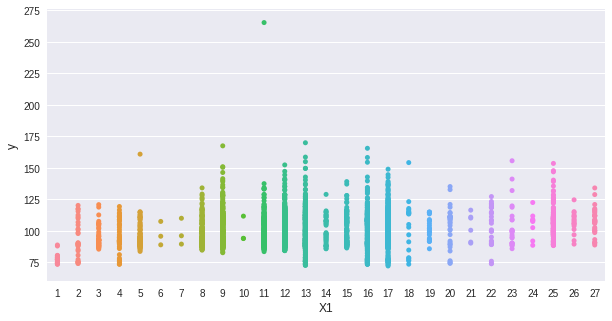

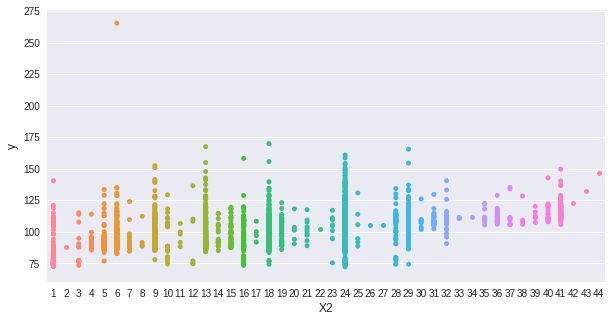

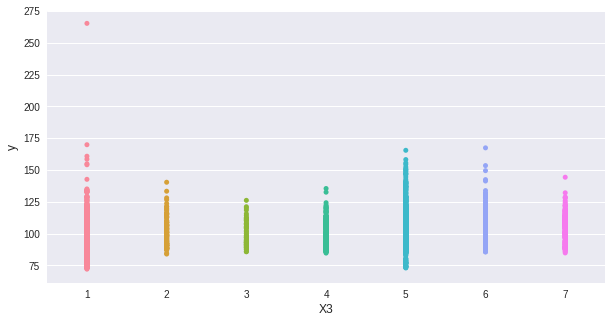

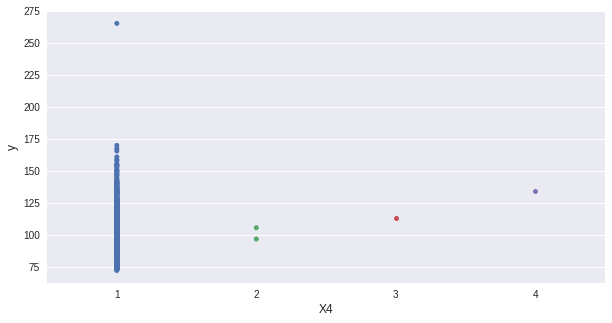

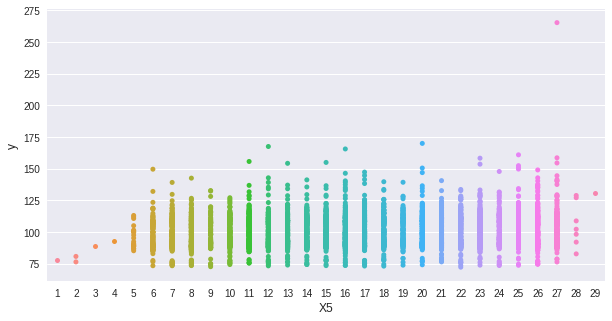

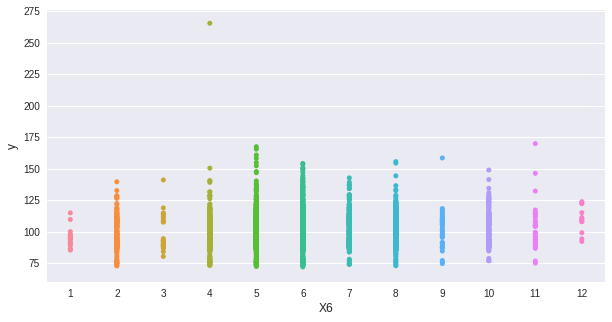

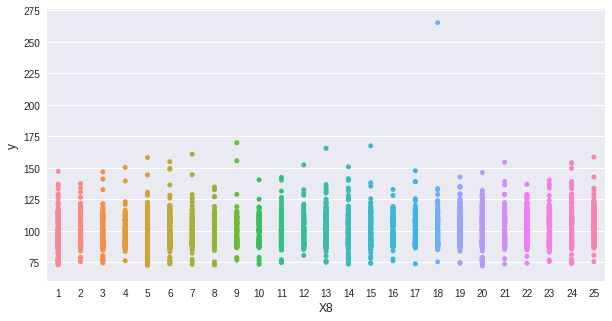

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
for var_name in contAttr:
    #col_order = np.sort(train_df[var_name].unique()).tolist()
    #col_order = B['index'].values
    col_order = np.arange(1,len(train[var_name].unique())+1)

    plt.figure(figsize=(10,5))
    sns.stripplot(x=var_name, y='y', data=train)
    plt.xlabel(var_name, fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.show()

    


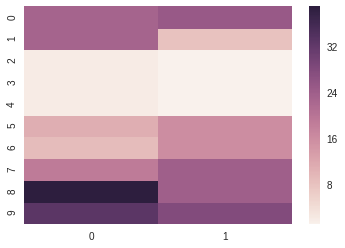

In [13]:
%matplotlib inline
sns.heatmap(np.c_[train.X0,train.X2][:10])

In [26]:
from sklearn.linear_model import  Lasso
from sklearn.linear_model import  ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

def output_result(filename,grid_search,test_X,ID):
    #cl.transform(test_X)
    Pred_test=grid_search.best_estimator_.predict(test_X)
    test_op=pd.DataFrame({'ID':ID,'y':Pred_test})
    test_op.to_csv(filename,index=False)
###########  


def AdaboostR():
    from sklearn.ensemble import AdaBoostRegressor
    ada=AdaBoostRegressor()
    scl=StandardScaler()
    X_train=train.drop(["y"],axis=1)
    #X_test=test.drop("ID",axis=1)
    X_test=test
    X_train=scl.fit_transform(X_train)              
    X_test=scl.transform(X_test)              
    param_grid = [
    {'n_estimators':[1,2,3,4]}
    ]
    ada_reg=AdaBoostRegressor()
    grid_search = GridSearchCV(AdaBoostRegressor(), param_grid, cv=5,scoring='r2',n_jobs=-1)
    grid_search.fit(X_train, train.y)
    cvres = pd.DataFrame(grid_search.cv_results_)
    cvres=pd.DataFrame(cvres.drop(["mean_fit_time","mean_score_time","std_score_time","std_fit_time"],axis=1)).sort_values(['rank_test_score'])
    output_result("AdaboostR.csv",grid_search,X_test,test.ID)
    print(grid_search.best_estimator_ ) 
    return cvres

def KNNRegressor():
    from sklearn.neighbors import KNeighborsRegressor
    scl=StandardScaler()
    X_train=train.drop(["y"],axis=1)
    #X_test=test.drop("ID",axis=1)
    X_test=test
    X_train=scl.fit_transform(X_train)              
    X_test=scl.transform(X_test)              
    param_grid = [
    {'n_neighbors':[1,2,3,4]}
    ]
    grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5,scoring='r2',n_jobs=-1)
    grid_search.fit(X_train, train.y)
    cvres = pd.DataFrame(grid_search.cv_results_)
    cvres=pd.DataFrame(cvres.drop(["mean_fit_time","mean_score_time","std_score_time","std_fit_time"],axis=1)).sort_values(['rank_test_score'])
    output_result("KNeighborsRegressor.csv",grid_search,X_test,test.ID)
    print(grid_search.best_estimator_ ) 
    return cvres


def RandForestRegressor():
    from sklearn.ensemble import RandomForestRegressor
    scl=StandardScaler()
    X_train=train.drop(["y"],axis=1)
    #X_test=test.drop("ID",axis=1)
    X_test=test
    X_train=scl.fit_transform(X_train)              
    X_test=scl.transform(X_test)              
    param_grid = [
    {'n_estimators':[1,2,3,4]}
    ]
    grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5,scoring='r2',n_jobs=-1)
    grid_search.fit(X_train, train.y)
    cvres = pd.DataFrame(grid_search.cv_results_)
    cvres=pd.DataFrame(cvres.drop(["mean_fit_time","mean_score_time","std_score_time","std_fit_time"],axis=1)).sort_values(['rank_test_score'])
    output_result("RandomForestRegressor.csv",grid_search,X_test,test.ID)
    print(grid_search.best_estimator_ ) 
    return cvres


def svreg():
    from sklearn.svm import SVR
    scl=StandardScaler()
    X_train=train.drop(["y"],axis=1)
    #X_test=test.drop("ID",axis=1)
    X_test=test
    X_train=scl.fit_transform(X_train)              
    X_test=scl.transform(X_test)              
    param_grid = [
    {'C':[1,2,3,4]}
    ]
    grid_search = GridSearchCV(SVR(), param_grid, cv=5,scoring='r2',n_jobs=-1)
    grid_search.fit(X_train, train.y)
    cvres = pd.DataFrame(grid_search.cv_results_)
    cvres=pd.DataFrame(cvres.drop(["mean_fit_time","mean_score_time","std_score_time","std_fit_time"],axis=1)).sort_values(['rank_test_score'])
    output_result("SVR.csv",grid_search,X_test,test.ID)
    print(grid_search.best_estimator_ ) 
    return cvres
    
def TreeRegresion():
    from sklearn.tree import ExtraTreeRegressor
    scl=StandardScaler()
    X_train=train.drop(["y"],axis=1)
    #X_test=test.drop("ID",axis=1)
    X_test=test
    X_train=scl.fit_transform(X_train)              
    X_test=scl.transform(X_test)              
    param_grid = [
    {'n_estimators':[1,2,3,4,5,6]}
    ]
    grid_search = GridSearchCV(ExtraTreeRegressor(), param_grid, cv=5,scoring='r2',n_jobs=1)
    grid_search.fit(X_train, train.y)
    cvres = pd.DataFrame(grid_search.cv_results_)
    cvres=pd.DataFrame(cvres.drop(["mean_fit_time","mean_score_time","std_score_time","std_fit_time"],axis=1)).sort_values(['rank_test_score'])
    output_result("AdaboostR.csv",grid_search,X_test,test.ID)
    print(grid_search.best_estimator_ )
    
    return cvres

def GradBoostingRegressor():
    from sklearn.ensemble import GradientBoostingRegressor
    scl=StandardScaler()
    X_train=train.drop(["y"],axis=1)
    #X_test=test.drop("ID",axis=1)
    X_test=test
    X_train=scl.fit_transform(X_train)              
    X_test=scl.transform(X_test)              
    param_grid = [
    {'n_estimators':[1,2,3,4,5,6]}
    ]
    grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5,scoring='r2',n_jobs=1)
    grid_search.fit(X_train, train.y)
    cvres = pd.DataFrame(grid_search.cv_results_)
    cvres=pd.DataFrame(cvres.drop(["mean_fit_time","mean_score_time","std_score_time","std_fit_time"],axis=1)).sort_values(['rank_test_score'])
    output_result("GradientBoostingRegressor.csv",grid_search,X_test,test.ID)
    print(grid_search.best_estimator_ )
    
    return cvres



def iterative_linear():
    from sklearn.linear_model import SGDRegressor
    sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
    learning_rate="constant", eta0=0.0005)
    scl=StandardScaler()
    X_train1=train.drop(["y"],axis=1)
    #X_test=test.drop("ID",axis=1)
    X_test1=test
    X_train1=scl.fit_transform(X_train1)              
    X_test1=scl.transform(X_test1)
    #sgd_reg.fit(X_train, train.y)
    #output_result("sgd.csv",grid_search,X_test,test.ID)
    #print(grid_search.best_estimator_ ) 
    mean_train_scores=[]
    mean_test_scores=[]
    for epoch in range(10000):
        kf = KFold(train.shape[0],n_folds=4,shuffle=True,random_state=42)
        test_scores=[]
        train_scores=[]
        for train_index, test_index in kf:
                #print("TRAIN:", train_index, "TEST:", test_index)
                X_train, X_test = X_train1[train_index], X_test1[test_index]
                y_train, y_test = train.y[train_index], train.y[test_index]
                sgd_reg.fit(X_train, y_train)
                #print(r2_score(model.predict(dtest), dtest.get_label()))
                test_scores.append(-1*int(r2_score(sgd_reg.predict(X_test),y_test)*10000)/10000)
                train_scores.append(-1*int(r2_score(sgd_reg.predict(X_train), y_train)*10000)/10000)
        mean_test_scores.append(np.mean(test_scores))
        mean_train_scores.append(np.mean(train_scores))
    plt.figure(figsize=(12,5))
    plt.plot(mean_test_scores,"r-")
    plt.plot(mean_train_scores,"b--")
    plt.yscale('log')
    plt.show()
    return  mean_test_scores,mean_train_scores

#test_scores,train_scores=iterative_linear()    
#ElstNet()
#cvres=AdaboostR()

def ElstNet():

    scl=StandardScaler()
    X_train=train.drop(["y","ID"],axis=1)
    X_test=test.drop("ID",axis=1)
    #X_test=test
    X_train=scl.fit_transform(X_train)              
    X_test=scl.transform(X_test)              
    param_grid = [
    {'l1_ratio':np.linspace(1.0,1.0,1), 'max_iter':[1000],'alpha':np.linspace(0.20,0.22,10)}
    ]

    from sklearn.preprocessing import PolynomialFeatures
    elastic_reg=ElasticNet()
    grid_search = GridSearchCV(elastic_reg, param_grid, cv=5,scoring='r2',n_jobs=20)
    grid_search.fit((X_train), train.y)
    cvres = pd.DataFrame(grid_search.cv_results_)
    cvres=pd.DataFrame(cvres.drop(["mean_fit_time","mean_score_time","std_score_time","std_fit_time"],axis=1)).sort_values(['rank_test_score'])
    output_result("elasticnet.csv",grid_search,(X_test),test.ID)
    print(grid_search.best_estimator_ ) 
    cvres

AdaboostR()
KNNRegressor()
RandForestRegressor()
svreg()
GradBoostingRegressor()
iterative_linear()

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=3, random_state=None)
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=4, p=2,
          weights='uniform')
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=4, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
SVR(C=4, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             

NameError: name 'r2_score' is not defined

In [19]:
cvres #20

,mean_test_score,mean_train_score,param_alpha,param_l1_ratio,param_max_iter,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_test_score,std_train_score
16,0.575718,0.592264,0.237368,1,1000,"{'alpha': 0.237368421053, 'l1_ratio': 1.0, 'ma...",1,0.623919,0.572817,0.445841,0.633545,0.610997,0.583310,0.552362,0.598356,0.645552,0.573292,0.071915,0.022625
17,0.575714,0.591907,0.241579,1,1000,"{'alpha': 0.241578947368, 'l1_ratio': 1.0, 'ma...",2,0.623977,0.572445,0.445826,0.633191,0.610953,0.582988,0.552364,0.597951,0.645530,0.572961,0.071919,0.022619
15,0.575713,0.592618,0.233158,1,1000,"{'alpha': 0.233157894737, 'l1_ratio': 1.0, 'ma...",3,0.623839,0.573196,0.445850,0.633893,0.611037,0.583626,0.552354,0.598758,0.645568,0.573617,0.071908,0.022629
18,0.575707,0.591550,0.245789,1,1000,"{'alpha': 0.245789473684, 'l1_ratio': 1.0, 'ma...",4,0.624025,0.572077,0.445806,0.632833,0.610904,0.582662,0.552361,0.597542,0.645524,0.572639,0.071927,0.022610
14,0.575703,0.592978,0.228947,1,1000,"{'alpha': 0.228947368421, 'l1_ratio': 1.0, 'ma...",5,0.623729,0.573585,0.445864,0.634251,0.611071,0.583936,0.552348,0.599175,0.645586,0.573942,0.071896,0.022637
19,0.575697,0.591199,0.25,1,1000,"{'alpha': 0.25, 'l1_ratio': 1.0, 'max_iter': 1...",6,0.624068,0.571711,0.445777,0.632474,0.610853,0.582340,0.552349,0.597133,0.645522,0.572337,0.071939,0.022596
13,0.575690,0.593342,0.224737,1,1000,"{'alpha': 0.224736842105, 'l1_ratio': 1.0, 'ma...",7,0.623606,0.573978,0.445866,0.634623,0.611107,0.584246,0.552345,0.599593,0.645611,0.574270,0.071887,0.022648
12,0.575671,0.593709,0.220526,1,1000,"{'alpha': 0.220526315789, 'l1_ratio': 1.0, 'ma...",8,0.623473,0.574365,0.445867,0.634993,0.611148,0.584562,0.552324,0.600033,0.645627,0.574590,0.071878,0.022662
11,0.575648,0.594074,0.216316,1,1000,"{'alpha': 0.216315789474, 'l1_ratio': 1.0, 'ma...",9,0.623331,0.574743,0.445860,0.635355,0.611182,0.584872,0.552300,0.600470,0.645653,0.574932,0.071871,0.022671
10,0.575626,0.594439,0.212105,1,1000,"{'alpha': 0.212105263158, 'l1_ratio': 1.0, 'ma...",10,0.623198,0.575120,0.445847,0.635721,0.611209,0.585179,0.552285,0.600906,0.645672,0.575270,0.071866,0.022682


In [4]:
cvres

,mean_test_score,mean_train_score,param_alpha,param_l1_ratio,param_max_iter,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_test_score,std_train_score
49,0.576083,0.592962,0.2,1,1000,"{'alpha': 0.2, 'l1_ratio': 1.0, 'max_iter': 1000}",1,0.621989,0.573599,0.447759,0.634852,0.611320,0.583992,0.552115,0.598761,0.647317,0.573607,0.071365,0.022884
44,0.576040,0.593431,0.194444,1,1000,"{'alpha': 0.194444444444, 'l1_ratio': 1.0, 'ma...",2,0.621774,0.574056,0.447765,0.635353,0.611367,0.584431,0.552064,0.599265,0.647315,0.574052,0.071343,0.022906
39,0.576002,0.593906,0.188889,1,1000,"{'alpha': 0.188888888889, 'l1_ratio': 1.0, 'ma...",3,0.621526,0.574523,0.447761,0.635851,0.611411,0.584864,0.552014,0.599759,0.647383,0.574534,0.071334,0.022919
34,0.575951,0.594389,0.183333,1,1000,"{'alpha': 0.183333333333, 'l1_ratio': 1.0, 'ma...",4,0.621223,0.574997,0.447737,0.636348,0.611462,0.585313,0.551943,0.600254,0.647476,0.575034,0.071332,0.022926
29,0.575881,0.594889,0.177778,1,1000,"{'alpha': 0.177777777778, 'l1_ratio': 1.0, 'ma...",5,0.620890,0.575470,0.447698,0.636843,0.611501,0.585756,0.551875,0.600807,0.647528,0.575569,0.071323,0.022930
24,0.575815,0.595390,0.172222,1,1000,"{'alpha': 0.172222222222, 'l1_ratio': 1.0, 'ma...",6,0.620562,0.575934,0.447649,0.637325,0.611579,0.586220,0.551812,0.601363,0.647559,0.576105,0.071318,0.022929
19,0.575730,0.595895,0.166667,1,1000,"{'alpha': 0.166666666667, 'l1_ratio': 1.0, 'ma...",7,0.620235,0.576408,0.447575,0.637806,0.611628,0.586693,0.551736,0.601908,0.647558,0.576660,0.071313,0.022922
14,0.575631,0.596398,0.161111,1,1000,"{'alpha': 0.161111111111, 'l1_ratio': 1.0, 'ma...",8,0.619882,0.576889,0.447500,0.638280,0.611662,0.587151,0.551650,0.602437,0.647546,0.577234,0.071303,0.022908
9,0.575517,0.596910,0.155556,1,1000,"{'alpha': 0.155555555556, 'l1_ratio': 1.0, 'ma...",9,0.619523,0.577390,0.447447,0.638762,0.611645,0.587615,0.551563,0.602958,0.647490,0.577827,0.071271,0.022890
48,0.575465,0.593276,0.2,0.975,1000,"{'alpha': 0.2, 'l1_ratio': 0.975, 'max_iter': ...",10,0.619166,0.573921,0.447697,0.635177,0.611498,0.584150,0.551908,0.599049,0.647141,0.574084,0.071028,0.022871


In [38]:
(grid_search.best_estimator_.coef_.nonzero()[0]),"   ",(grid_search.best_estimator_.coef_.nonzero())[0].shape

(array([  5,  10,  26,  27,  44,  52,  71,  91, 100, 124, 127, 157, 195,
        196, 223, 224, 228, 232, 255, 259, 271, 284, 303, 304, 305, 306,
        330, 333, 340, 355, 356, 373, 380, 381, 392, 439, 443, 468, 477,
        545, 574, 615, 616, 644]), '   ', (44,))